## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 59ms	remaining: 58.9s
1:	learn: 0.9606716	total: 60ms	remaining: 29.9s
2:	learn: 0.9390920	total: 61.1ms	remaining: 20.3s
3:	learn: 0.9209237	total: 62ms	remaining: 15.4s
4:	learn: 0.9046978	total: 63ms	remaining: 12.5s
5:	learn: 0.8896854	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8724151	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8558633	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8400199	total: 66.9ms	remaining: 7.37s
9:	learn: 0.8229065	total: 67.9ms	remaining: 6.72s
10:	learn: 0.8057776	total: 68.7ms	remaining: 6.18s
11:	learn: 0.7907426	total: 69.5ms	remaining: 5.72s
12:	learn: 0.7753485	total: 70.4ms	remaining: 5.34s
13:	learn: 0.7601130	total: 71.2ms	remaining: 5.02s
14:	learn: 0.7475256	total: 72.3ms	remaining: 4.75s
15:	learn: 0.7326054	total: 73.3ms	remaining: 4.51s
16:	learn: 0.7206853	total: 74.2ms	remaining: 4.29s
17:	learn: 0.7077303	total: 75.3ms	remaining: 4.11s
18:	learn: 0.6955287	total: 76.2ms	remaining: 3.93s


87:	learn: 0.3291335	total: 137ms	remaining: 1.42s
88:	learn: 0.3267592	total: 139ms	remaining: 1.42s
89:	learn: 0.3246472	total: 139ms	remaining: 1.41s
90:	learn: 0.3226321	total: 140ms	remaining: 1.4s
91:	learn: 0.3208859	total: 141ms	remaining: 1.39s
92:	learn: 0.3195327	total: 142ms	remaining: 1.38s
93:	learn: 0.3177265	total: 142ms	remaining: 1.37s
94:	learn: 0.3159930	total: 143ms	remaining: 1.36s
95:	learn: 0.3146725	total: 144ms	remaining: 1.36s
96:	learn: 0.3128617	total: 145ms	remaining: 1.35s
97:	learn: 0.3114186	total: 146ms	remaining: 1.34s
98:	learn: 0.3101878	total: 147ms	remaining: 1.33s
99:	learn: 0.3091652	total: 147ms	remaining: 1.33s
100:	learn: 0.3073446	total: 148ms	remaining: 1.32s
101:	learn: 0.3059717	total: 149ms	remaining: 1.31s
102:	learn: 0.3044976	total: 150ms	remaining: 1.3s
103:	learn: 0.3030824	total: 150ms	remaining: 1.3s
104:	learn: 0.3013455	total: 151ms	remaining: 1.29s
105:	learn: 0.2996238	total: 152ms	remaining: 1.28s
106:	learn: 0.2980370	total:

135:	learn: 0.2666442	total: 177ms	remaining: 1.12s
136:	learn: 0.2656536	total: 178ms	remaining: 1.12s
137:	learn: 0.2644756	total: 179ms	remaining: 1.12s
138:	learn: 0.2634933	total: 180ms	remaining: 1.11s
139:	learn: 0.2624546	total: 180ms	remaining: 1.11s
140:	learn: 0.2619103	total: 181ms	remaining: 1.1s
141:	learn: 0.2611219	total: 182ms	remaining: 1.1s
142:	learn: 0.2604558	total: 183ms	remaining: 1.1s
143:	learn: 0.2590422	total: 184ms	remaining: 1.09s
144:	learn: 0.2583398	total: 185ms	remaining: 1.09s
145:	learn: 0.2574131	total: 186ms	remaining: 1.08s
146:	learn: 0.2561256	total: 186ms	remaining: 1.08s
147:	learn: 0.2550767	total: 187ms	remaining: 1.08s
148:	learn: 0.2541599	total: 188ms	remaining: 1.07s
149:	learn: 0.2534840	total: 189ms	remaining: 1.07s
150:	learn: 0.2527124	total: 190ms	remaining: 1.07s
151:	learn: 0.2520669	total: 191ms	remaining: 1.06s
152:	learn: 0.2511829	total: 191ms	remaining: 1.06s
153:	learn: 0.2507161	total: 192ms	remaining: 1.06s
154:	learn: 0.2

298:	learn: 0.1781306	total: 328ms	remaining: 770ms
299:	learn: 0.1778034	total: 330ms	remaining: 771ms
300:	learn: 0.1773609	total: 332ms	remaining: 771ms
301:	learn: 0.1771097	total: 335ms	remaining: 774ms
302:	learn: 0.1766351	total: 336ms	remaining: 774ms
303:	learn: 0.1762749	total: 341ms	remaining: 781ms
304:	learn: 0.1758184	total: 345ms	remaining: 786ms
305:	learn: 0.1755761	total: 349ms	remaining: 791ms
306:	learn: 0.1752450	total: 351ms	remaining: 792ms
307:	learn: 0.1748989	total: 353ms	remaining: 792ms
308:	learn: 0.1745082	total: 355ms	remaining: 794ms
309:	learn: 0.1740813	total: 361ms	remaining: 803ms
310:	learn: 0.1738419	total: 363ms	remaining: 805ms


311:	learn: 0.1734089	total: 367ms	remaining: 809ms
312:	learn: 0.1731178	total: 371ms	remaining: 813ms
313:	learn: 0.1727077	total: 373ms	remaining: 814ms
314:	learn: 0.1723778	total: 375ms	remaining: 815ms
315:	learn: 0.1720145	total: 376ms	remaining: 814ms
316:	learn: 0.1715627	total: 378ms	remaining: 814ms
317:	learn: 0.1714053	total: 379ms	remaining: 813ms
318:	learn: 0.1709797	total: 380ms	remaining: 812ms
319:	learn: 0.1706233	total: 382ms	remaining: 812ms
320:	learn: 0.1703284	total: 384ms	remaining: 812ms
321:	learn: 0.1700544	total: 386ms	remaining: 812ms
322:	learn: 0.1696955	total: 389ms	remaining: 816ms
323:	learn: 0.1695203	total: 393ms	remaining: 819ms
324:	learn: 0.1693707	total: 395ms	remaining: 820ms
325:	learn: 0.1690932	total: 397ms	remaining: 821ms
326:	learn: 0.1687871	total: 398ms	remaining: 820ms
327:	learn: 0.1684932	total: 401ms	remaining: 822ms
328:	learn: 0.1680740	total: 404ms	remaining: 824ms
329:	learn: 0.1676495	total: 406ms	remaining: 824ms
330:	learn: 

414:	learn: 0.1458079	total: 513ms	remaining: 724ms
415:	learn: 0.1454856	total: 515ms	remaining: 723ms
416:	learn: 0.1452920	total: 516ms	remaining: 722ms
417:	learn: 0.1450629	total: 518ms	remaining: 721ms
418:	learn: 0.1448614	total: 519ms	remaining: 720ms
419:	learn: 0.1446689	total: 521ms	remaining: 719ms
420:	learn: 0.1444776	total: 522ms	remaining: 718ms
421:	learn: 0.1442240	total: 523ms	remaining: 716ms
422:	learn: 0.1439486	total: 524ms	remaining: 715ms
423:	learn: 0.1436187	total: 525ms	remaining: 713ms
424:	learn: 0.1435537	total: 526ms	remaining: 712ms
425:	learn: 0.1433151	total: 527ms	remaining: 711ms
426:	learn: 0.1430439	total: 529ms	remaining: 709ms
427:	learn: 0.1426884	total: 530ms	remaining: 708ms
428:	learn: 0.1424781	total: 531ms	remaining: 707ms
429:	learn: 0.1421988	total: 532ms	remaining: 705ms
430:	learn: 0.1421505	total: 533ms	remaining: 704ms
431:	learn: 0.1419280	total: 534ms	remaining: 702ms
432:	learn: 0.1417165	total: 536ms	remaining: 702ms
433:	learn: 

446:	learn: 0.1386018	total: 552ms	remaining: 683ms
447:	learn: 0.1384516	total: 554ms	remaining: 682ms
448:	learn: 0.1382484	total: 555ms	remaining: 681ms
449:	learn: 0.1381172	total: 556ms	remaining: 679ms
450:	learn: 0.1378456	total: 558ms	remaining: 679ms
451:	learn: 0.1376080	total: 559ms	remaining: 678ms
452:	learn: 0.1374147	total: 561ms	remaining: 678ms
453:	learn: 0.1372011	total: 563ms	remaining: 677ms
454:	learn: 0.1370442	total: 564ms	remaining: 676ms
455:	learn: 0.1367090	total: 565ms	remaining: 674ms
456:	learn: 0.1364920	total: 566ms	remaining: 673ms
457:	learn: 0.1363161	total: 568ms	remaining: 672ms
458:	learn: 0.1360567	total: 569ms	remaining: 671ms
459:	learn: 0.1358680	total: 570ms	remaining: 669ms
460:	learn: 0.1356531	total: 571ms	remaining: 668ms
461:	learn: 0.1353811	total: 572ms	remaining: 667ms
462:	learn: 0.1351649	total: 574ms	remaining: 665ms
463:	learn: 0.1349162	total: 575ms	remaining: 664ms
464:	learn: 0.1347597	total: 576ms	remaining: 663ms
465:	learn: 

565:	learn: 0.1170940	total: 704ms	remaining: 540ms
566:	learn: 0.1169048	total: 707ms	remaining: 540ms
567:	learn: 0.1167425	total: 709ms	remaining: 539ms
568:	learn: 0.1166102	total: 711ms	remaining: 539ms
569:	learn: 0.1164306	total: 713ms	remaining: 538ms
570:	learn: 0.1162908	total: 715ms	remaining: 537ms
571:	learn: 0.1161027	total: 717ms	remaining: 536ms
572:	learn: 0.1159918	total: 719ms	remaining: 536ms
573:	learn: 0.1157478	total: 720ms	remaining: 534ms
574:	learn: 0.1155859	total: 722ms	remaining: 534ms
575:	learn: 0.1154385	total: 724ms	remaining: 533ms
576:	learn: 0.1153858	total: 726ms	remaining: 532ms
577:	learn: 0.1153157	total: 728ms	remaining: 531ms
578:	learn: 0.1150992	total: 730ms	remaining: 530ms
579:	learn: 0.1147799	total: 731ms	remaining: 529ms
580:	learn: 0.1146177	total: 734ms	remaining: 529ms
581:	learn: 0.1144786	total: 735ms	remaining: 528ms


582:	learn: 0.1143718	total: 738ms	remaining: 528ms
583:	learn: 0.1142120	total: 740ms	remaining: 527ms
584:	learn: 0.1139755	total: 743ms	remaining: 527ms
585:	learn: 0.1137566	total: 745ms	remaining: 526ms
586:	learn: 0.1135706	total: 747ms	remaining: 526ms
587:	learn: 0.1134748	total: 749ms	remaining: 525ms
588:	learn: 0.1134371	total: 751ms	remaining: 524ms
589:	learn: 0.1131994	total: 755ms	remaining: 525ms
590:	learn: 0.1130597	total: 756ms	remaining: 523ms
591:	learn: 0.1128132	total: 758ms	remaining: 522ms
592:	learn: 0.1126699	total: 760ms	remaining: 521ms
593:	learn: 0.1125247	total: 761ms	remaining: 520ms
594:	learn: 0.1123135	total: 762ms	remaining: 519ms
595:	learn: 0.1120719	total: 763ms	remaining: 517ms
596:	learn: 0.1118641	total: 764ms	remaining: 516ms
597:	learn: 0.1116640	total: 766ms	remaining: 515ms
598:	learn: 0.1114721	total: 767ms	remaining: 513ms
599:	learn: 0.1113192	total: 768ms	remaining: 512ms
600:	learn: 0.1111923	total: 769ms	remaining: 511ms
601:	learn: 

739:	learn: 0.0925957	total: 890ms	remaining: 313ms
740:	learn: 0.0925025	total: 891ms	remaining: 311ms
741:	learn: 0.0923401	total: 892ms	remaining: 310ms
742:	learn: 0.0923163	total: 892ms	remaining: 309ms
743:	learn: 0.0921469	total: 893ms	remaining: 307ms
744:	learn: 0.0920264	total: 894ms	remaining: 306ms
745:	learn: 0.0918709	total: 895ms	remaining: 305ms
746:	learn: 0.0917286	total: 896ms	remaining: 303ms
747:	learn: 0.0916813	total: 897ms	remaining: 302ms
748:	learn: 0.0915730	total: 898ms	remaining: 301ms
749:	learn: 0.0915436	total: 898ms	remaining: 299ms
750:	learn: 0.0914450	total: 899ms	remaining: 298ms
751:	learn: 0.0912826	total: 900ms	remaining: 297ms
752:	learn: 0.0911103	total: 901ms	remaining: 296ms
753:	learn: 0.0909450	total: 902ms	remaining: 294ms
754:	learn: 0.0908138	total: 902ms	remaining: 293ms
755:	learn: 0.0907134	total: 903ms	remaining: 292ms
756:	learn: 0.0906398	total: 904ms	remaining: 290ms
757:	learn: 0.0905546	total: 905ms	remaining: 289ms
758:	learn: 

781:	learn: 0.0877384	total: 926ms	remaining: 258ms
782:	learn: 0.0876342	total: 927ms	remaining: 257ms
783:	learn: 0.0874749	total: 928ms	remaining: 256ms
784:	learn: 0.0872790	total: 929ms	remaining: 254ms
785:	learn: 0.0871866	total: 930ms	remaining: 253ms
786:	learn: 0.0870605	total: 931ms	remaining: 252ms
787:	learn: 0.0869480	total: 932ms	remaining: 251ms
788:	learn: 0.0868796	total: 933ms	remaining: 249ms
789:	learn: 0.0867424	total: 933ms	remaining: 248ms
790:	learn: 0.0866955	total: 934ms	remaining: 247ms
791:	learn: 0.0865584	total: 935ms	remaining: 246ms
792:	learn: 0.0864905	total: 936ms	remaining: 244ms
793:	learn: 0.0863819	total: 937ms	remaining: 243ms
794:	learn: 0.0863573	total: 938ms	remaining: 242ms
795:	learn: 0.0862351	total: 939ms	remaining: 241ms
796:	learn: 0.0861251	total: 940ms	remaining: 239ms
797:	learn: 0.0860579	total: 941ms	remaining: 238ms
798:	learn: 0.0860072	total: 941ms	remaining: 237ms
799:	learn: 0.0859006	total: 942ms	remaining: 236ms
800:	learn: 

957:	learn: 0.0717643	total: 1.08s	remaining: 47.4ms
958:	learn: 0.0716632	total: 1.08s	remaining: 46.2ms
959:	learn: 0.0716285	total: 1.08s	remaining: 45.1ms
960:	learn: 0.0716086	total: 1.08s	remaining: 44ms
961:	learn: 0.0715439	total: 1.08s	remaining: 42.8ms
962:	learn: 0.0714557	total: 1.08s	remaining: 41.7ms
963:	learn: 0.0713766	total: 1.08s	remaining: 40.5ms
964:	learn: 0.0713120	total: 1.09s	remaining: 39.4ms
965:	learn: 0.0712524	total: 1.09s	remaining: 38.3ms
966:	learn: 0.0711092	total: 1.09s	remaining: 37.1ms
967:	learn: 0.0710991	total: 1.09s	remaining: 36ms
968:	learn: 0.0709569	total: 1.09s	remaining: 34.9ms
969:	learn: 0.0708275	total: 1.09s	remaining: 33.7ms
970:	learn: 0.0707121	total: 1.09s	remaining: 32.6ms
971:	learn: 0.0706513	total: 1.09s	remaining: 31.5ms
972:	learn: 0.0705804	total: 1.09s	remaining: 30.4ms
973:	learn: 0.0705152	total: 1.09s	remaining: 29.2ms
974:	learn: 0.0704742	total: 1.09s	remaining: 28.1ms
975:	learn: 0.0704049	total: 1.1s	remaining: 27ms


998:	learn: 0.0687463	total: 1.12s	remaining: 1.12ms
999:	learn: 0.0687026	total: 1.12s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10086284224083752


#### Sanity Checks 

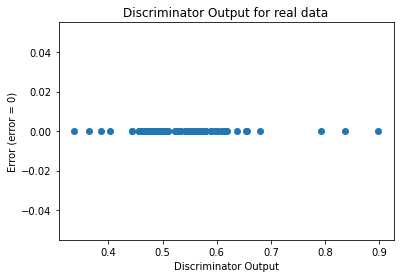

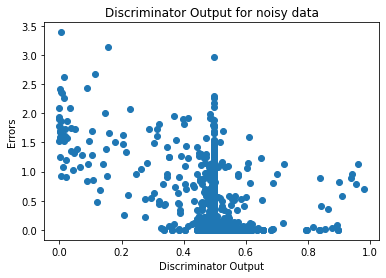

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 29


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.09326651898413743


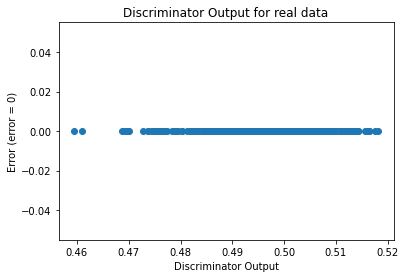

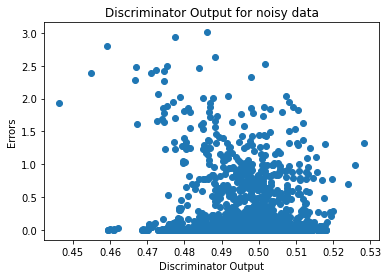

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01399428752834198


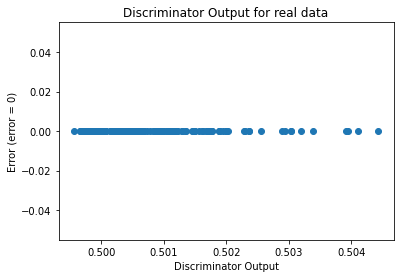

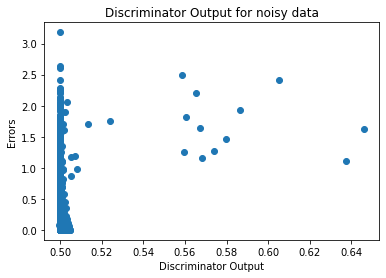

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[7.2998e-06]], requires_grad=True)
